./data/2024-05-09_17-22-52.txt
t
8994
p1
8994
m1
8994
m2
8994
e2
8994
I
8994
              t   p1        m1   m2       e2    I
0     1066208.0  0.0 -374246.0  0.0  27500.0  0.0
1     1066293.0  0.0 -374246.0  0.0  27495.0  0.0
2     1066337.0  0.0 -374246.0  0.0  27496.0  0.0
3     1066337.0  0.0 -374246.0  0.0  27496.0  0.0
4     1066337.0  0.0 -374246.0  0.0  27496.0  0.0
...         ...  ...       ...  ...      ...  ...
8989  1185286.0  0.0 -284102.0  0.0  27733.0  0.0
8990  1185295.0  0.0 -284096.0  0.0  27734.0  0.0
8991  1185311.0  0.0 -284102.0  0.0  27732.0  0.0
8992  1185333.0  0.0 -284100.0  0.0  27736.0  0.0
8993  1185341.0  0.0 -284102.0  0.0  27732.0  0.0

[8994 rows x 6 columns]


interactive(children=(IntSlider(value=0, description='start_index', max=8993), IntSlider(value=8993, descripti…

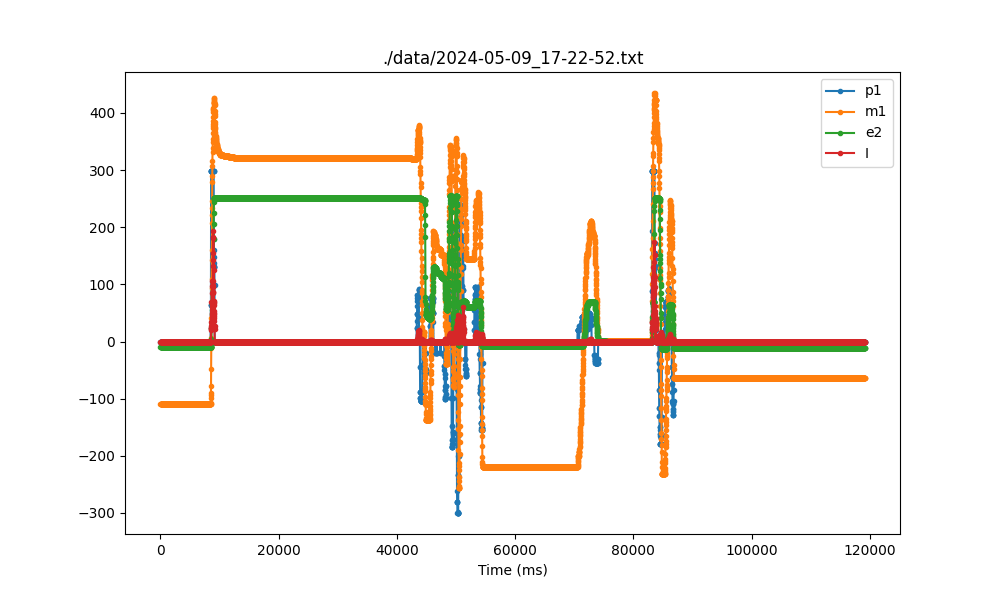

In [51]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
import glob
import os
import matplotlib.pyplot as plt
from ipywidgets import interact, IntSlider
%matplotlib widget

list_of_files = [f for f in glob.glob('./data/*') if not os.path.isdir(f)] #take all files but not folders
latest_file = max(list_of_files, key=os.path.getctime)

# file_path = latest_file
file_path = "./data/2024-05-09_17-22-52.txt"
print(file_path)

# Read the text file into a list of lines
with open(file_path, 'r') as file:
    lines = file.readlines()

labels = [
    't',
    'p1',
    'm1',
    'm2',
    'e2', 
    'I'
]
data_dict = {label: [] for label in labels}

last_delimiter_index = 0

delimiter = '#'
messages = []
for i in range(len(lines)):
    if(lines[i].startswith(delimiter)):
        messages.append(lines[last_delimiter_index:i])
        last_delimiter_index = i
        # print("found ", i)

for message in messages:
    # print("message")
    # message_dict = dict.fromkeys(labels, [])
    message_dict = {label: [] for label in labels}
    for label in labels:
        for line in message:
                if(line.startswith(label)):
                    # print("append ", label, float(line.split(':')[1]))
                    message_dict[label].append(float(line.split(':')[1]))
                    # print(message_dict[label])
    # print(message_dict)
    full = True
    for key in message_dict:
        if(len(message_dict[key]) == 0):
            # print(message_dict)
            full=False
            break
    if(full):
        for label in labels:
            # print((message_dict[label]))
            data_dict[label].append(message_dict[label][0])
    
    # if(len)


for series in data_dict:
    print(series)
    print(len(data_dict[series]))
# Create a dataframe from the extracted values
df_raw = pd.DataFrame(data_dict)
df = None #cropped version

print(df_raw)


plt.close('all')

fig, ax = plt.subplots(1, 1, figsize=(10,6))
@interact(start_index=IntSlider(min=0, max=len(df_raw)-1, step=1, value=0),
          end_index=IntSlider(min=0, max=len(df_raw)-1, step=1, value=len(df_raw)-1))
def display_image(start_index, end_index):
    if(start_index >= end_index):
        return

    global df
    df = df_raw[start_index:end_index]

    df.loc[:,'t'] = df['t'] - df['t'][0]
    
    ax.clear()
    ax.set_title(file_path)
    ax.set_xlabel('Time (ms)')

    df.loc[:,'m1'] *= 0.0005
    df.loc[:,'m1'] -= -78
    df.loc[:,'e2'] *= -0.01
    df.loc[:,'e2'] -= -266
    df.loc[:,'I'] *= 0.01


    ignore = ['t', 'm2']
    for label in labels:
        if(label in ignore):
            continue
        ax.plot(df['t'], df[label], '.-', label=label)
    ax.legend()

    average_step_size = df['t'].diff().mean()
    print("Average Step Size:", average_step_size)
plt.show()


